# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/8.9 MB ? eta -:--:--

   ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/8.9 MB ? eta -:--:--

   ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/8.9 MB 2.2 MB/s eta 0:00:04

   ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/8.9 MB 2.0 MB/s eta 0:00:05

   ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/8.9 MB 1.5 MB/s eta 0:00:06

   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/8.9 MB 1.5 MB/s eta 0:00:06

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/8.9 MB 1.5 MB/s eta 0:00:06

   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/8.9 MB 1.4 MB/s eta 0:00:05

   ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/8.9 MB 1.4 MB/s eta 0:00:05

   ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/8.9 MB 1.5 MB/s eta 0:00:05

   ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/8.9 MB 1.5 MB/s eta 0:00:04

   ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/8.9 MB 1.5 MB/s eta 0:00:04

   ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 3.7/8.9 MB 1.5 MB/s eta 0:00:04

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.9/8.9 MB 1.5 MB/s eta 0:00:04

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.9/8.9 MB 1.5 MB/s eta 0:00:04

   ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 4.5/8.9 MB 1.5 MB/s eta 0:00:04

   ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 4.7/8.9 MB 1.5 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 5.0/8.9 MB 1.5 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 5.2/8.9 MB 1.5 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 5.8/8.9 MB 1.5 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 5.8/8.9 MB 1.5 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 6.3/8.9 MB 1.5 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 6.8/8.9 MB 1.5 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 7.3/8.9 MB 1.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 7.6/8.9 MB 1.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 7.9/8.9 MB 1.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 8.1/8.9 MB 1.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 8.7/8.9 MB 1.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.4 MB ? eta -:--:--

   ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/2.4 MB ? eta -:--:--

   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/2.4 MB 1.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 1.0/2.4 MB 2.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 1.8/2.4 MB 2.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 2.4 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.3 MB ? eta -:--:--

   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/1.3 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 0.8/1.3 MB 1.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/764.2 kB ? eta -:--:--

   ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/764.2 kB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.2/764.2 kB 2.5 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.6 MB ? eta -:--:--

   ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/1.6 MB ? eta -:--:--

   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/1.6 MB 2.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 0.8/1.6 MB 1.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 1.3/1.6 MB 1.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.8 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.2 MB ? eta -:--:--

   ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/2.2 MB ? eta -:--:--

   ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/2.2 MB 2.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/2.2 MB 1.2 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 1.0/2.2 MB 1.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 1.6/2.2 MB 1.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 2.1/2.2 MB 1.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.7 MB/s eta 0:00:00


  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3


   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  5/27 [protobuf]

   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━  9/27 [xgboost]

   ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 15/27 [google-auth]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 18/27 [graphene]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 21/27 [databricks-sdk]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 21/27 [databricks-sdk]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 23/27 [mlflow-tracing]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 23/27 [mlflow-tracing]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 24/27 [mlflow-skinny]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 24/27 [mlflow-skinny]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 24/27 [mlflow-skinny]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 24/27 [mlflow-skinny]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 25/27 [mlflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 25/27 [mlflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 25/27 [mlflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 25/27 [mlflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 25/27 [mlflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27/27 [lazypredict]


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

zsh:1: command not found: wget


In [4]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [6]:
# Examine X dimension
X.shape

(4695, 881)

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [9]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


In [10]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.86,0.86,0.57,0.06
ExtraTreeRegressor,0.86,0.86,0.57,0.06
ExtraTreesRegressor,0.86,0.86,0.57,2.53
GaussianProcessRegressor,0.86,0.86,0.57,1.85
RandomForestRegressor,0.82,0.83,0.64,1.88
XGBRegressor,0.82,0.83,0.65,0.33
BaggingRegressor,0.80,0.81,0.67,0.21
MLPRegressor,0.76,0.77,0.75,4.07
HistGradientBoostingRegressor,0.67,0.69,0.87,0.45


In [11]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,0.44
LGBMRegressor,0.44,0.52,1.08,0.16
XGBRegressor,0.44,0.52,1.08,0.33
RandomForestRegressor,0.44,0.52,1.08,1.84
BaggingRegressor,0.40,0.49,1.11,0.20
NuSVR,0.39,0.48,1.12,0.61
SVR,0.39,0.48,1.12,0.69
KNeighborsRegressor,0.37,0.46,1.14,0.05
MLPRegressor,0.36,0.45,1.15,3.14


## **5. Data visualization of model performance**

[(0.0, 1.0)]

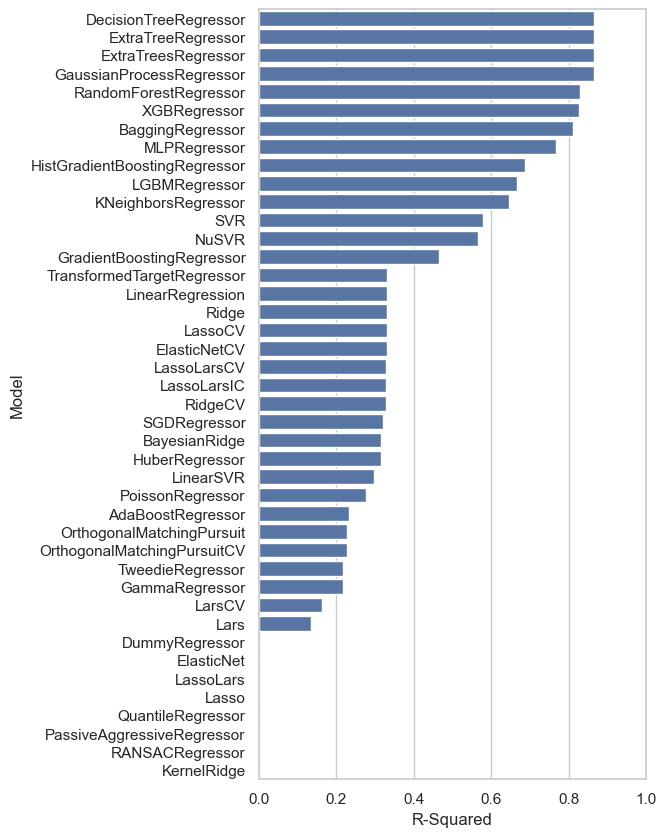

In [12]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

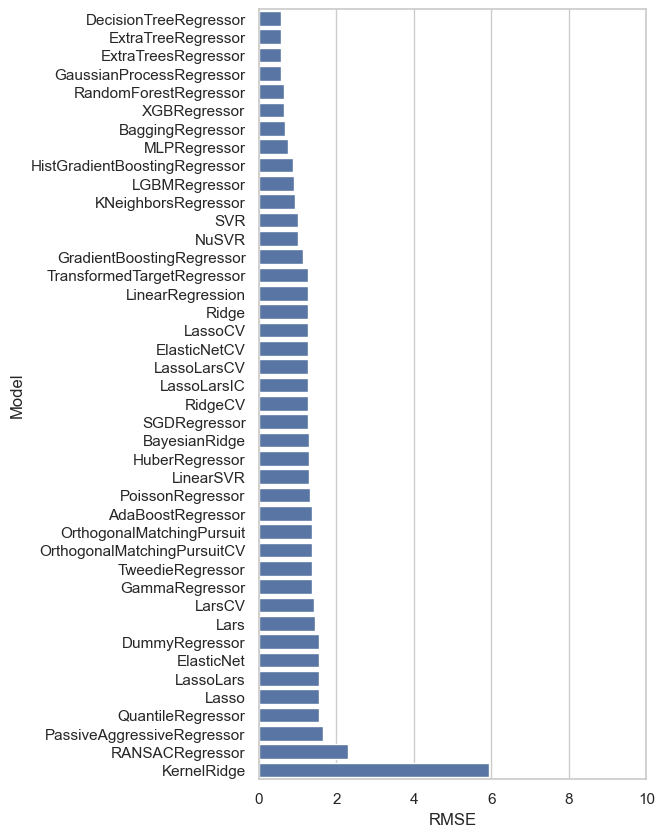

In [13]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

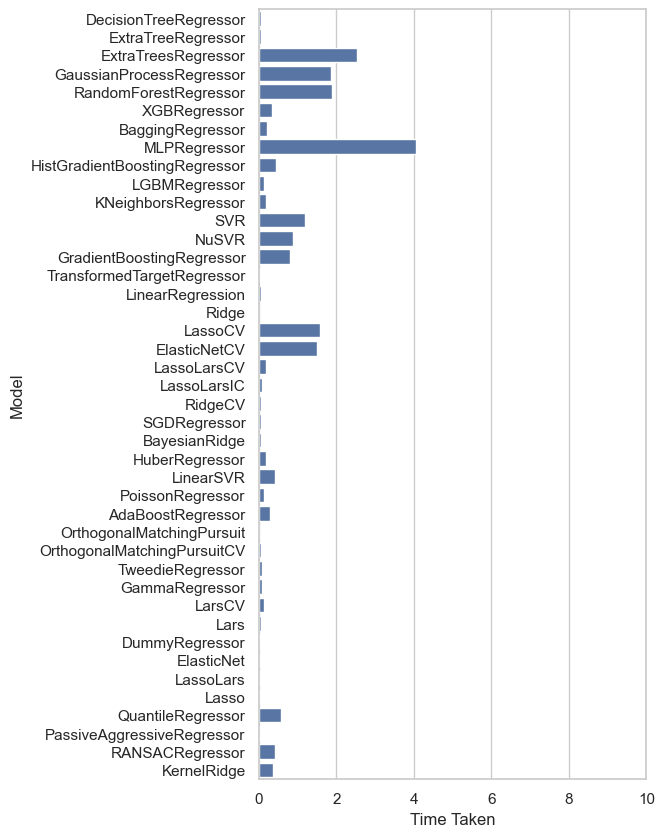

In [14]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))